<a href="https://colab.research.google.com/github/Titiprihartati/Bike-sharing-dataset/blob/main/Analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Titi Prihartati]
- **Email:** [titiprihartati@gmail.com]
- **ID Dicoding:** [mc223d5x0527]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah sepeda yang disewa?
- Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

Untuk melakukan analisis, perlu mengimpor library yang menyediakan berbagai fungsi dan alat yang dibutuhkan dalam proses manipulasi data, perhitungan statistik, visualisasi, dan pembuatan model.

In [2]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling
pada data wrangling akan dilakukan pengumpulan data, penilaian data, dan pembersihan data sebelum data digunakan dalam proses analisis lebih lanjut

### Gathering Data

mengimpor data set yang akan dianalisis


In [4]:
bike_df = pd.read_csv("https://raw.githubusercontent.com/Titiprihartati/Bike-sharing-dataset/refs/heads/main/day.csv")
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike2_df = pd.read_csv("https://raw.githubusercontent.com/Titiprihartati/Bike-sharing-dataset/refs/heads/main/hour.csv")
bike2_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv (bike_df) Berisi informasi penyewaan sepeda per hari.
Termasuk variabel seperti suhu (temp), kelembaban (hum), jumlah sepeda yang disewa (cnt), dan lainnya.
Dapat digunakan untuk melihat tren musiman dalam penyewaan sepeda.

- Dataset hour.csv (bike2_df)Berisi informasi penyewaan sepeda per jam.
Memiliki variabel tambahan seperti jam (hr), kondisi cuaca (weathersit), dan lainnya.
Berguna untuk analisis pola penggunaan sepeda berdasarkan waktu dalam sehari.

### Assessing Data
melihat masalah yang terdapat dalam data set untuk di tangani sesuai kebutuhan analisis

#### Menilai Tabel `bike_df`

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel `bike2_df`


In [10]:
bike2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
bike2_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", bike2_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
bike2_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengetahui tipe data yang ada di bike_df dan bike2_df untuk dianalisa lebih lanjut dan di ubah sesuai dengan kebutuhan analisis.
- baik dari bike_df maupun bike2_df tidak terdapat duplicate data
-melihat analisis deskriptif dari data bike_df dan bike2_df

### Cleaning Data
melakukan pembersihan data, seperti duplicate data, dan missing value pada data.

#### Membersihkan Tabel `bike_df`

#### Duplicate Data

In [13]:
bike_df.drop_duplicates(inplace=True)

In [14]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())


Jumlah duplikasi:  0


In [15]:
bike2_df.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", bike2_df.duplicated().sum())


Jumlah duplikasi:  0


#### Missing Value

In [17]:
bike_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [18]:
bike2_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Memperbaiki Tipe data

Merubah tipe data sesuai dengan kebutuhan analisis. pada kedua data set yang di gunakan akan di ubah

##### Memperbaiki Tipe data `bike_df`

In [19]:
# Ubah tanggal ke datetime
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])

# Ubah variabel kategori
cat_cols = ["season", "mnth", "weekday", "weathersit", "yr", "holiday", "workingday"]
for col in cat_cols:
    bike_df[col] = bike_df[col].astype("category")

bike_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

##### Memperbaiki Tipe data `bike2_df`

In [20]:
# Ubah tanggal ke datetime
bike2_df["dteday"] = pd.to_datetime(bike2_df["dteday"])

# Ubah variabel kategori
cat_cols = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
for col in cat_cols:
    bike2_df[col] = bike2_df[col].astype("category")

bike2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- pada data bike_df dan bike2_df data nya sudah bersih karena tidak terdapat duplicate data dan tidak terdapat missing value
- perubahan tipe data pada bike_df dan bike2_df di sesuaikan dengan kebutuhan analisis. dimana merubahnya menjadi data kategori, float dan int.


## Exploratory Data Analysis (EDA)
menggunakan statistik untuk

Explore `bike_df`




In [21]:
bike_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
518,519,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120
427,428,2012-03-03,1,1,3,0,6,0,2,0.414167,0.413492,0.621250,0.161079,956,3110,4066
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
318,319,2011-11-15,4,0,11,0,2,1,2,0.530000,0.507579,0.688750,0.199633,449,3746,4195
666,667,2012-10-28,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008,998,3461,4459


In [22]:
bike_df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bike_df.instant.is_unique

True

In [23]:
# Grouping berdasarkan suhu (dibagi dalam interval)
bike_df["temp_group"] = pd.qcut(bike_df["temp"], q=4, labels=["Dingin", "Sejuk", "Hangat", "Panas"])

# Analisis statistik berdasarkan suhu
temp_analysis = bike_df.groupby("temp_group").agg({
    "cnt": ["mean", "median", "min", "max", "std"],
    "registered": ["mean", "sum"],
    "casual": ["mean", "sum"]
})

# Tampilkan hasil analisis
temp_analysis


<ipython-input-23-e86e32037ac1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = bike_df.groupby("temp_group").agg({


cnt                                    registered          \
                   mean  median   min   max          std         mean     sum   
temp_group                                                                      
Dingin      2615.076503  2252.0   431  5686  1335.257297  2332.021858  426760   
Sejuk       4186.568306  4189.0    22  8090  1658.591182  3465.442623  634176   
Hangat      5591.104396  5236.0  1842  8714  1638.545324  4455.472527  810896   
Panas       5630.584699  5463.0  1115  8173  1304.439083  4376.120219  800830   

                 casual          
                   mean     sum  
temp_group                       
Dingin       283.054645   51799  
Sejuk        721.125683  131966  
Hangat      1135.631868  206685  
Panas       1254.464481  229567

Explore `bike2_df`




In [24]:
bike2_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14936,14937,2012-09-19,3,1,9,13,0,3,1,1,0.60,0.6212,0.40,0.2537,55,234,289
7161,7162,2011-10-31,4,0,10,0,0,1,1,1,0.26,0.3030,0.87,0.0000,3,20,23
3108,3109,2011-05-14,2,0,5,10,0,6,0,2,0.52,0.5000,0.94,0.1642,34,133,167
12377,12378,2012-06-04,2,1,6,22,0,1,1,1,0.56,0.5303,0.52,0.2836,41,127,168
11917,11918,2012-05-16,2,1,5,18,0,3,1,1,0.72,0.6667,0.51,0.2239,97,749,846


In [25]:
bike2_df.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
bike2_df.instant.is_unique

True

In [27]:
# Grouping berdasarkan suhu (dibagi dalam interval)
bike2_df["temp_group"] = pd.qcut(bike2_df["temp"], q=4, labels=["Dingin", "Sejuk", "Hangat", "Panas"])

# Analisis statistik berdasarkan suhu
temp_analysis = bike2_df.groupby("temp_group").agg({
    "cnt": ["mean", "median", "min", "max", "std"],
    "registered": ["mean", "sum"],
    "casual": ["mean", "sum"]
})

# Tampilkan hasil analisis
temp_analysis


<ipython-input-27-fd69abcd7cbc>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = bike2_df.groupby("temp_group").agg({


cnt                              registered          \
                  mean median min  max         std        mean     sum   
temp_group                                                               
Dingin       97.650943   63.0   1  729  111.810987   89.039413  424718   
Sejuk       168.955257  133.0   1  839  155.039788  141.551834  578947   
Hangat      214.301773  172.0   1  977  195.769696  171.863608  824086   
Panas       297.604726  269.0   2  970  195.078308  226.882653  844911   

               casual          
                 mean     sum  
temp_group                     
Dingin       8.611530   41077  
Sejuk       27.403423  112080  
Hangat      42.438165  203491  
Panas       70.722073  263369

In [28]:
# Analisis statistik berdasarkan jam
hour_analysis = bike2_df.groupby("hr").agg({
    "cnt": ["mean", "median", "sum", "max"],
    "registered": ["mean", "sum"],
    "casual": ["mean", "sum"]
})

# Tampilkan hasil analisis
hour_analysis


<ipython-input-28-76c85e0dd571>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_analysis = bike2_df.groupby("hr").agg({


cnt                      registered             casual       
          mean median     sum  max        mean     sum       mean    sum
hr                                                                      
0    53.898072   40.0   39130  283   43.739669   31755  10.158402   7375
1    33.375691   20.0   24164  168   26.871547   19455   6.504144   4709
2    22.869930   11.0   16352  132   18.097902   12940   4.772028   3412
3    11.727403    6.0    8174   79    9.011478    6281   2.715925   1893
4     6.352941    6.0    4428   28    5.098996    3554   1.253945    874
5    19.889819   19.0   14261   66   18.478382   13249   1.411437   1012
6    76.044138   76.0   55132  213   71.882759   52115   4.161379   3017
7   212.064649  208.0  154171  596  201.009629  146134  11.055021   8037
8   359.011004  385.0  261001  839  337.331499  245240  21.679505  15761
9   219.309491  216.0  159438  426  188.418157  136980  30.891334  22458
10  173.668501  147.0  126257  539  127.191197   92468  46.477304  33789
11  208.143054  180.0  151320  663  148.602476  108034  59.540578  43286
12  253.315934  229.0  184414  776  185.021978  134696  68.293956  49718
13  253.661180  224.0  184919  760  181.352538  132206  72.308642  52713
14  240.949246  212.0  175652  750  165.381344  120563  75.567901  55089
15  251.233196  227.0  183149  750  176.327846  128543  74.905350  54606
16  311.983562  304.5  227748  783  238.238356  173914  73.745205  53834
17  461.452055  475.0  336860  976  387.178082  282640  74.273973  54220
18  425.510989  418.5  309772  977  364.390110  265276  61.120879  44496
19  311.523352  309.5  226789  743  262.752747  191284  48.770604  35505
20  226.030220  223.5  164550  567  189.796703  138172  36.233516  26378
21  172.314560  173.5  125445  584  144.059066  104875  28.255495  20570
22  131.335165  129.0   95612  502  109.082418   79412  22.252747  16200
23   87.831044   80.0   63941  256   72.631868   52876  15.199176  11065

**Insight:**
- Dengan analisis deskriptif dapat di lihat bahwa rata rata jumlah penyewa sepeda dalam kelimpok suhu
- Dengan analisis deskriptif dapat di lihat pula rata rata jumlah penyewa sepeda pada jam tertentu


## Visualization & Explanatory Analysis


### Pertanyaan 1:
Bagaimana pengaruh suhu terhadap jumlah sepeda yang disewa?

In [29]:
all_temp = pd.concat([bike_df["temp"], bike2_df["temp"]])


In [30]:
bins = pd.qcut(all_temp, q=4, labels=["Dingin", "Sejuk", "Hangat", "Panas"])

In [31]:
# Gabungkan semua suhu untuk menentukan batas kategori yang sama
all_temp = pd.concat([bike_df["temp"], bike2_df["temp"]])

# Tentukan batas kuartil dengan np.quantile untuk menghindari error duplikat batas
quantiles = np.quantile(all_temp, q=[0, 0.25, 0.5, 0.75, 1])

# Pastikan batasnya unik (hindari duplikasi)
quantiles = np.unique(quantiles)

# Terapkan pd.cut() dengan batasan yang sudah diperbaiki
bike_df["temp_group"] = pd.cut(bike_df["temp"], bins=quantiles, labels=["Dingin", "Sejuk", "Hangat", "Panas"], include_lowest=True)
bike2_df["temp_group2"] = pd.cut(bike2_df["temp"], bins=quantiles, labels=["Dingin", "Sejuk", "Hangat", "Panas"], include_lowest=True)

# Cek hasilnya
print(bike_df["temp_group"].value_counts())
print(bike2_df["temp_group2"].value_counts())


temp_group
Hangat    190
Dingin    186
Sejuk     181
Panas     174
Name: count, dtype: int64
temp_group2
Hangat    4795
Dingin    4770
Sejuk     4090
Panas     3724
Name: count, dtype: int64


<ipython-input-32-d901458e8e27>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_per_temp = bike_df.groupby("temp_group")["cnt"].mean().reset_index()
<ipython-input-32-d901458e8e27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_per_temp, x="temp_group", y="cnt", order=["Dingin", "Sejuk", "Hangat", "Panas"], palette="Blues_r")


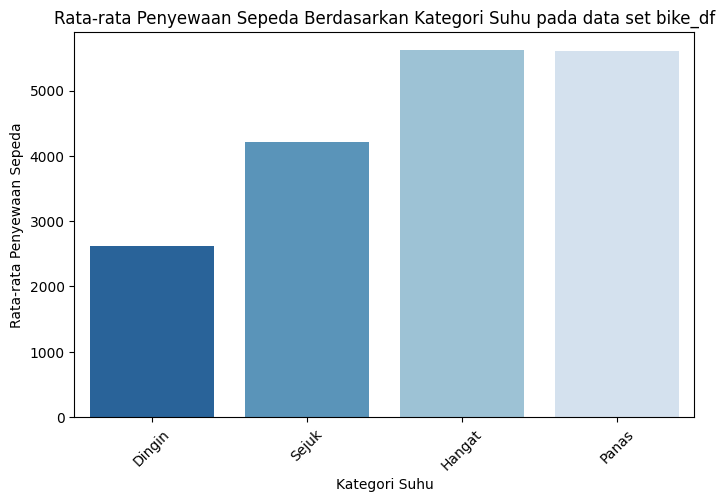

<ipython-input-32-d901458e8e27>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_per_temp = bike2_df.groupby("temp_group2")["cnt"].mean().reset_index()
<ipython-input-32-d901458e8e27>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_per_temp, x="temp_group2", y="cnt", order=["Dingin", "Sejuk", "Hangat", "Panas"], palette="Blues_r")


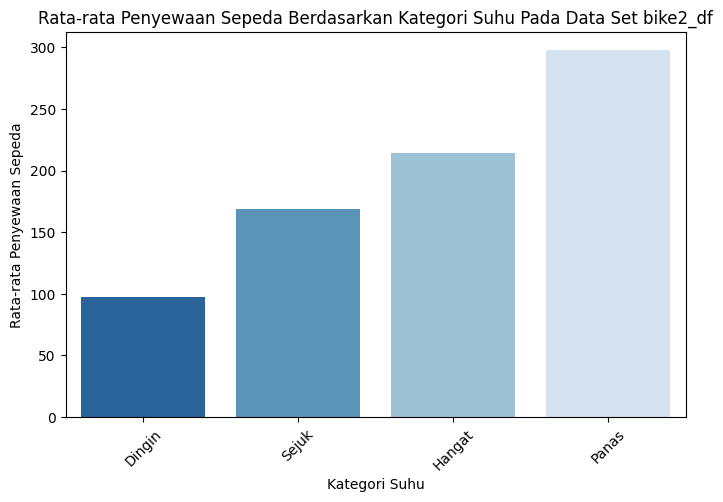

In [32]:
# Hitung rata-rata penyewaan per kategori suhu
avg_rentals_per_temp = bike_df.groupby("temp_group")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_per_temp, x="temp_group", y="cnt", order=["Dingin", "Sejuk", "Hangat", "Panas"], palette="Blues_r")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu pada data set bike_df")
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

avg_rentals_per_temp = bike2_df.groupby("temp_group2")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_per_temp, x="temp_group2", y="cnt", order=["Dingin", "Sejuk", "Hangat", "Panas"], palette="Blues_r")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu Pada Data Set bike2_df")
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:
Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya?

<ipython-input-33-7ea5eceb4bfc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = bike2_df.groupby("hr")["cnt"].sum().reset_index()


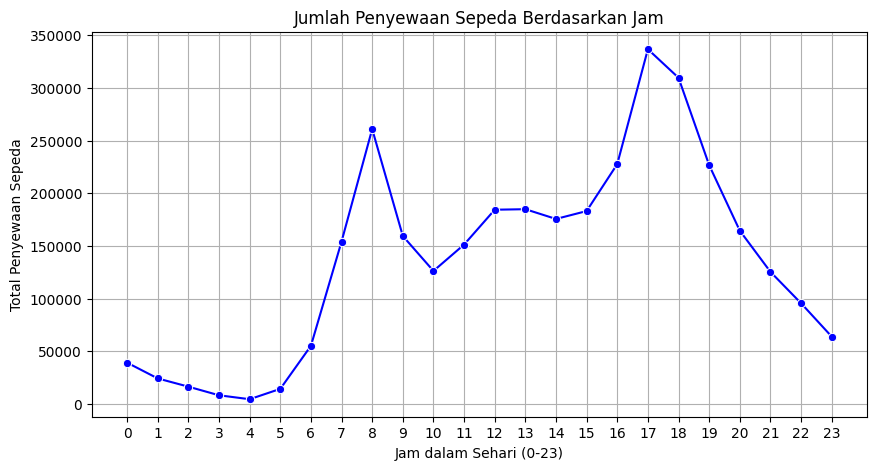

In [33]:
# Hitung total penyewaan sepeda untuk setiap jam
hourly_rentals = bike2_df.groupby("hr")["cnt"].sum().reset_index()

# Buat line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", marker="o", color="b", linestyle="-")

# Atur label
plt.xlabel("Jam dalam Sehari (0-23)")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam")

plt.xticks(range(0, 24))  # Pastikan sumbu x menampilkan semua jam
plt.grid(True)  # Tambahkan grid agar lebih mudah dibaca

plt.show()


**Insight:**
- Rata-rata penyewaan sepeda cenderung meningkat dari suhu dinggin, sejuk, hangat hingga panas
- Jumlah penyewaan sepeda berdasarkan jam banyak terjadi di jam pagi jam 8.00 dan sore hari jam 17.00

## Analisis Lanjutan
apakah suhu mempengaruhi penyewaan sepeda


In [35]:
combined_df = pd.concat([bike_df, bike2_df])
# Variabel independen (suhu)
X = combined_df[['temp']]
X = sm.add_constant(X)  # Tambah konstanta untuk model regresi

# Variabel dependen (jumlah penyewa)
y = combined_df['cnt']

# Model regresi
model = sm.OLS(y, X).fit()

# Hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     273.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           7.03e-61
Time:                        16:09:37   Log-Likelihood:            -1.4975e+05
No. Observations:               18110   AIC:                         2.995e+05
Df Residuals:                   18108   BIC:                         2.995e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0005     19.443      3.292      0.0

apakah jam mempengaruhi penyewaan sepeda


In [36]:
# Variabel independen (jam)
X = bike2_df[['hr']]
X = sm.add_constant(X)  # Tambahkan konstanta

# Variabel dependen (jumlah penyewa)
y = bike2_df['cnt']

# Model regresi
model = sm.OLS(y, X).fit()

# Hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3195.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:09:52   Log-Likelihood:            -1.1357e+05
No. Observations:               17379   AIC:                         2.272e+05
Df Residuals:                   17377   BIC:                         2.272e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0952      2.462     28.475      0.0

**Insight:**
- berdasarkan analisis regresi nilai p value untuk suhu < 0.05 hal ini menunjukan suhu secara statistik signifikan mempengaruhi jumlah penyewaan sepeda.
- berdasarkan analis regresi juga dapat di lihat bahwa jam mempengaruhi jumlah penyewaan sepeda.

## Conclusion

- Suhu berpengaruh positif terhadap jumlah penyewaan sepeda, di mana jumlah penyewaan meningkat seiring dengan suhu yang lebih tinggi.
- Puncak jumlah penyewaan sepeda terjadi pada jam 17.00, yang menunjukkan waktu ini sebagai periode dengan permintaan sepeda tertinggi.


In [40]:
from google.colab import files

# Gabungkan bike_df dan bike2_df
all_data = pd.concat([bike_df, bike2_df], ignore_index=True)

# Simpan all_data ke dalam file CSV
all_data.to_csv("all_data.csv", index=False)

# Tampilkan DataFrame yang sudah digabung
print(all_data)

# Unduh file CSV
files.download("all_data.csv")


       instant     dteday season yr mnth holiday weekday workingday  \
0            1 2011-01-01      1  0    1       0       6          0   
1            2 2011-01-02      1  0    1       0       0          0   
2            3 2011-01-03      1  0    1       0       1          1   
3            4 2011-01-04      1  0    1       0       2          1   
4            5 2011-01-05      1  0    1       0       3          1   
...        ...        ...    ... ..  ...     ...     ...        ...   
18105    17375 2012-12-31      1  1   12       0       1          1   
18106    17376 2012-12-31      1  1   12       0       1          1   
18107    17377 2012-12-31      1  1   12       0       1          1   
18108    17378 2012-12-31      1  1   12       0       1          1   
18109    17379 2012-12-31      1  1   12       0       1          1   

       weathersit      temp     atemp       hum  windspeed  casual  \
0               2  0.344167  0.363625  0.805833   0.160446     331   
1      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import files

# Menyimpan bike_df ke CSV
bike_df.to_csv("bike_df_data.csv", index=False)

# Mengunduh file CSV
files.download("bike_df_data.csv")
# Menyimpan bike2_df ke CSV

bike2_df.to_csv("bike2_df_data.csv", index=False)

# Mengunduh file CSV
files.download("bike2_df_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>